ARTI406 - Machine Learning

# Assignment 1: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

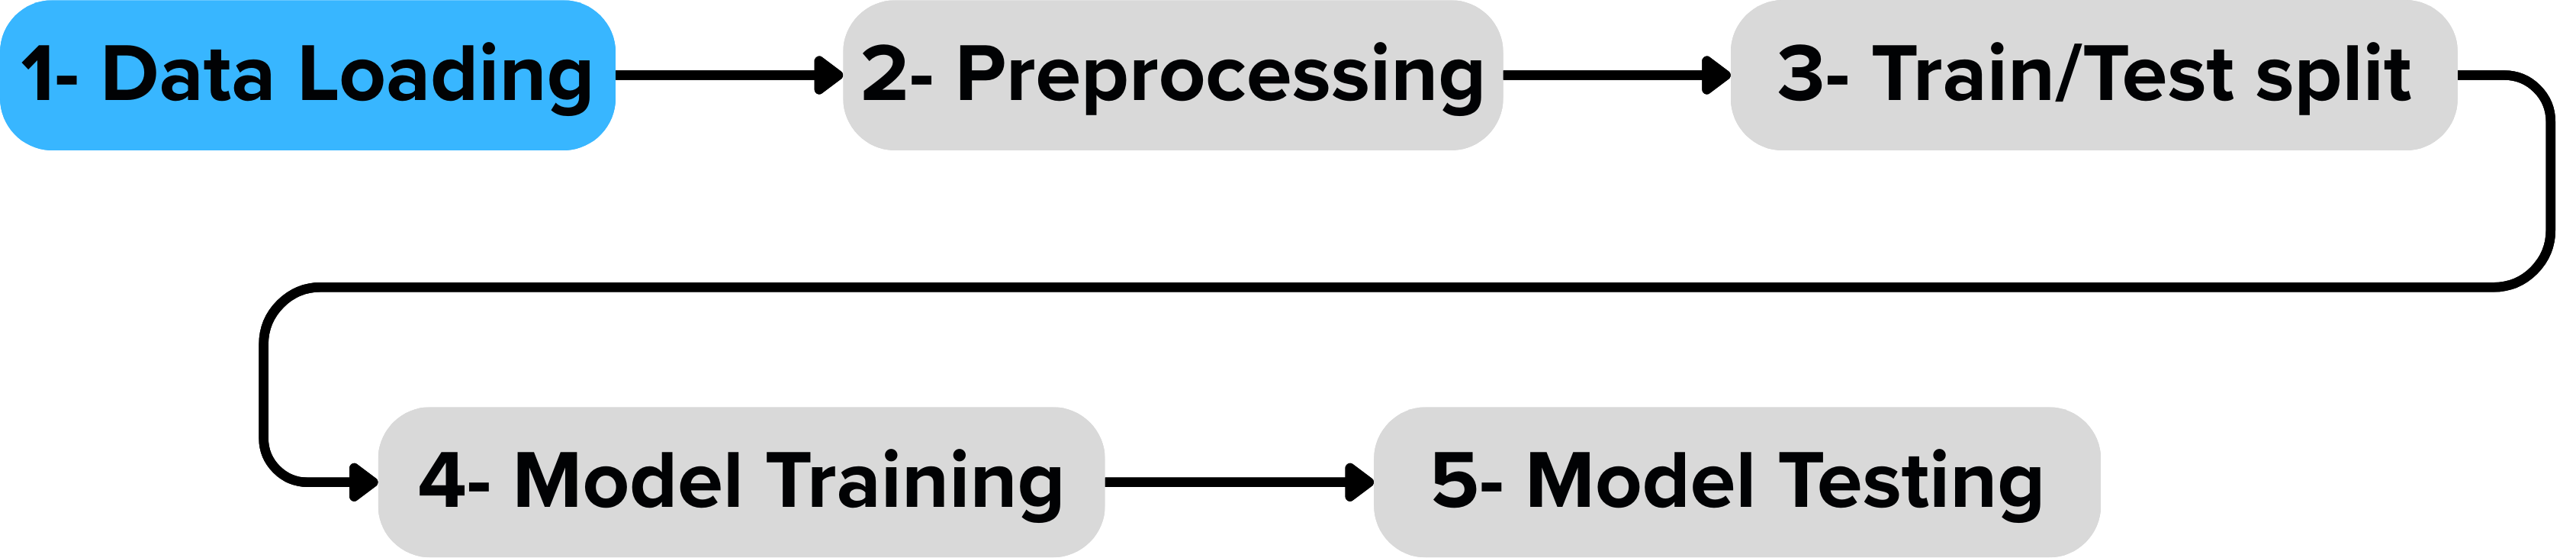

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [7]:
!pip install seaborn

In [20]:
# Load Dataset
df = pd.read_csv("sales_data.csv")
# Display first 5 rows. If you want to display all rows, use df.head(-1)
df.head(-1)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1068,2023-04-06,Alice,South,9093.50,31,Clothing,3169.37,3304.15,Returning,0.25,Credit Card,Retail,South-Alice
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David


### Check Missing Values

In [21]:
# Check all values
print(df.isna())

     Product_ID  Sale_Date  Sales_Rep  Region  Sales_Amount  Quantity_Sold  \
0         False      False      False   False         False          False   
1         False      False      False   False         False          False   
2         False      False      False   False         False          False   
3         False      False      False   False         False          False   
4         False      False      False   False         False          False   
..          ...        ...        ...     ...           ...            ...   
995       False      False      False   False         False          False   
996       False      False      False   False         False          False   
997       False      False      False   False         False          False   
998       False      False      False   False         False          False   
999       False      False      False   False         False          False   

     Product_Category  Unit_Cost  Unit_Price  Customer_Type  Di

In [22]:
print(df.isna().sum())

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64


### Check duplicate rows

In [23]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [24]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1000, 14) 

number of rows:  1000
number of columns:  14


### Data type of columns

In [25]:
# viewing the data types of columns
df.dtypes

Product_ID                int64
Sale_Date                   str
Sales_Rep                   str
Region                      str
Sales_Amount            float64
Quantity_Sold             int64
Product_Category            str
Unit_Cost               float64
Unit_Price              float64
Customer_Type               str
Discount                float64
Payment_Method              str
Sales_Channel               str
Region_and_Sales_Rep        str
dtype: object

In [28]:
df['Quantity_Sold'] = df['Quantity_Sold'].replace(r'[\$,]', '', regex=True)
df['Quantity_Sold'] = pd.to_numeric(df['Quantity_Sold'])

df.dtypes

Product_ID                int64
Sale_Date                   str
Sales_Rep                   str
Region                      str
Sales_Amount            float64
Quantity_Sold             int64
Product_Category            str
Unit_Cost               float64
Unit_Price              float64
Customer_Type               str
Discount                float64
Payment_Method              str
Sales_Channel               str
Region_and_Sales_Rep        str
dtype: object

In [29]:
# Statistical summary
df.describe(include='all')

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.00000,1000,1000,1000
unique,NaN,340,5,4,NaN,NaN,4,NaN,NaN,2,NaN,3,2,20
top,NaN,2023-11-14,David,North,NaN,NaN,Clothing,NaN,NaN,New,NaN,Credit Card,Retail,North-Eve
freq,NaN,8,222,267,NaN,NaN,268,NaN,NaN,504,NaN,345,512,64
mean,1050.128000,NaN,NaN,NaN,5019.265230,25.355000,NaN,2475.304550,2728.440120,NaN,0.15239,NaN,NaN,NaN
std,29.573505,NaN,NaN,NaN,2846.790126,14.159006,NaN,1417.872546,1419.399839,NaN,0.08720,NaN,NaN,NaN
min,1001.000000,NaN,NaN,NaN,100.120000,1.000000,NaN,60.280000,167.120000,NaN,0.00000,NaN,NaN,NaN
25%,1024.000000,NaN,NaN,NaN,2550.297500,13.000000,NaN,1238.380000,1509.085000,NaN,0.08000,NaN,NaN,NaN
50%,1051.000000,NaN,NaN,NaN,5019.300000,25.000000,NaN,2467.235000,2696.400000,NaN,0.15000,NaN,NaN,NaN
75%,1075.000000,NaN,NaN,NaN,7507.445000,38.000000,NaN,3702.865000,3957.970000,NaN,0.23000,NaN,NaN,NaN


### Descriptive summary Statistics

### Univariate Analysis

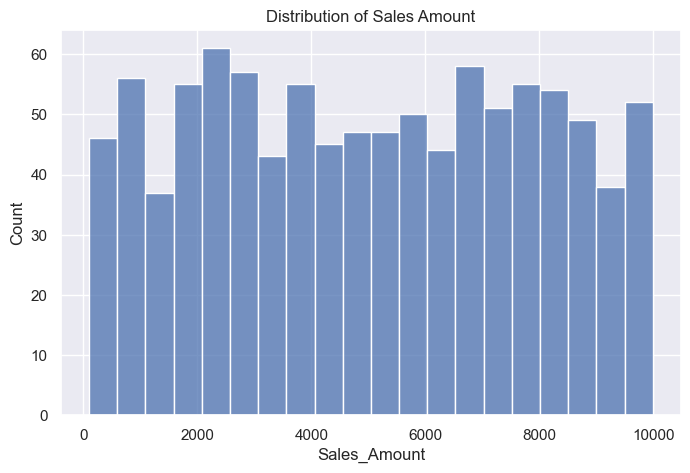

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales_Amount'], bins=20)
plt.title("Distribution of Sales Amount")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

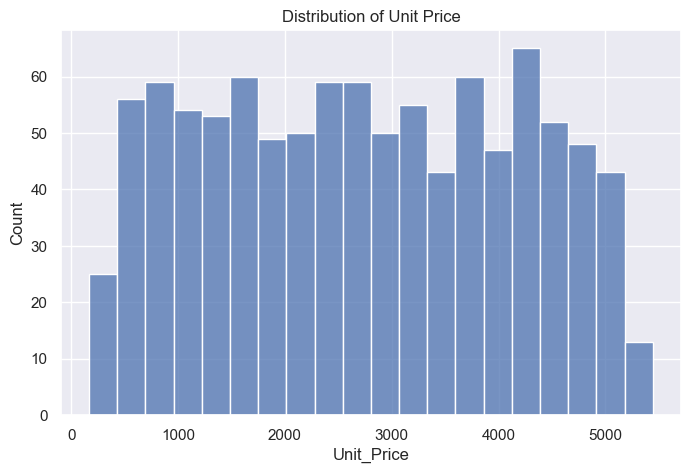

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Unit_Price'], bins=20)
plt.title("Distribution of Unit Price")
plt.show()

## Bivariate Analysis

### Revenue by Country

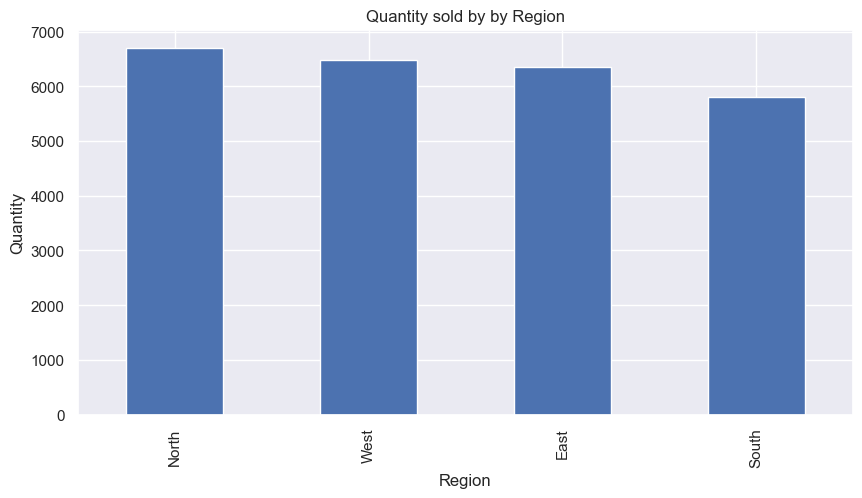

Region
North    6705
West     6486
East     6356
South    5808
Name: Quantity_Sold, dtype: int64

In [35]:
country_revenue = df.groupby('Region')['Quantity_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Quantity sold by by Region")
plt.ylabel("Quantity")
plt.show()

country_revenue

### Revenue by Product

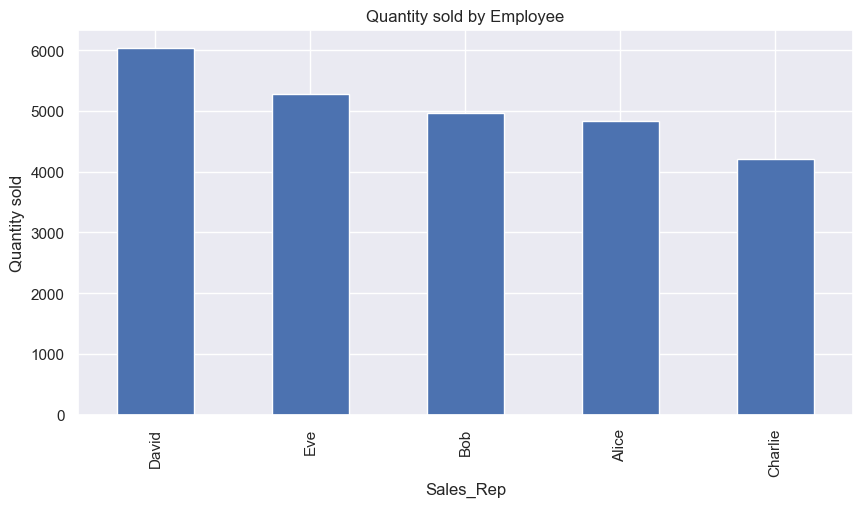

Sales_Rep
David      6042
Eve        5287
Bob        4977
Alice      4832
Charlie    4217
Name: Quantity_Sold, dtype: int64

In [37]:
product_revenue = df.groupby('Sales_Rep')['Quantity_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Quantity sold by Employee")
plt.ylabel("Quantity sold")
plt.show()

product_revenue

### Revenue by Sales Person

In [38]:
salesperson_revenue = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64

### Boxes vs Revenue Relationship

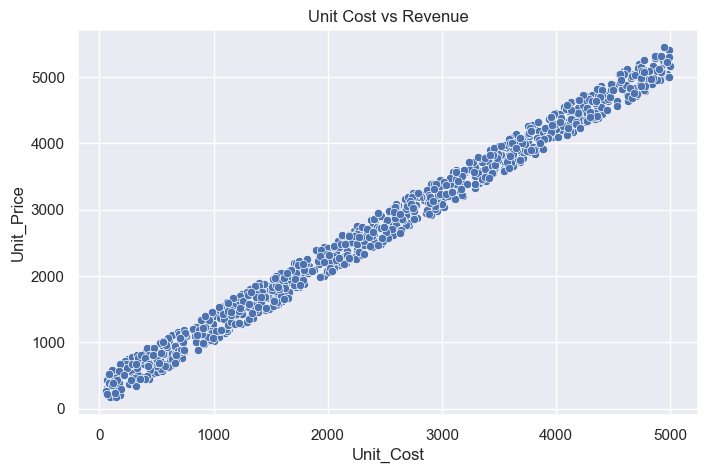

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Unit_Cost', y='Unit_Price', data=df)
plt.title("Unit Cost vs Revenue")
plt.show()

### Correlation Matrix

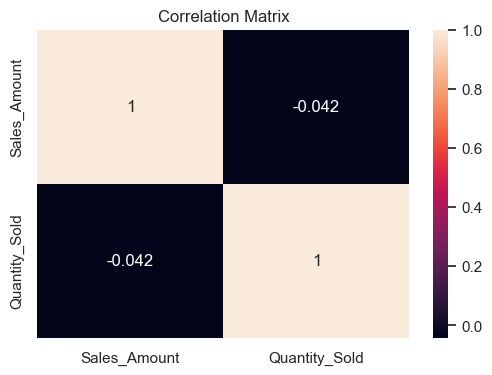

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

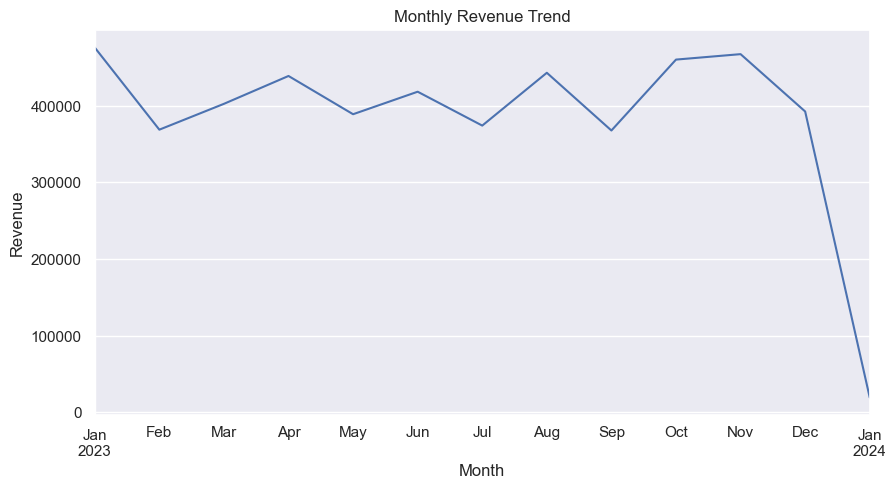

In [45]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

df['Month'] = df['Sale_Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Sales_Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the following to the assignment 1 folder.
1. Dataset file 
2. Dataset Description readme file
2. Jupyter Notebook
